In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [ ]:
data=pd.read_csv("11 Kategoriale_Variablen_Salorg.csv")
data


,Experience,yearsenior,Gender_1F,Salary
0,30,0,0,34550
1,26,0,0,30150
2,20,0,0,34000
3,8,0,0,26000
4,5,0,1,21500
...,...,...,...,...
145,5,0,0,21100
146,38,20,0,41200
147,19,2,0,33150
148,6,0,0,22650


In [ ]:
X = data[['Experience', 'yearsenior', 'Gender_1F']]  # Unabhängige Variable.
y = data['Salary']  # Abhängige Variable.

#Füge den unabhängigen Varaiblen eine Konstante hinzu ( für den Intercept im Regressionsmodell).
X = sm.add_constant(X)

#Passe das Regressionsmodell unter Verwendung der Methode der kleinsten Quadrate (OLS) an.
model = sm.OLS(y, X).fit()

#Zusammenfassung des Modells
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     273.5
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           1.06e-59
Time:                        14:39:20   Log-Likelihood:                -1390.5
No. Observations:                 150   AIC:                             2789.
Df Residuals:                     146   BIC:                             2801.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.264e+04    521.763     43.399      0.0

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     277.8
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           1.15e-50
Time:                        16:03:53   Log-Likelihood:                -1414.9
No. Observations:                 150   AIC:                             2836.
Df Residuals:                     147   BIC:                             2845.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.144e+04    582.291     36.821      0.0

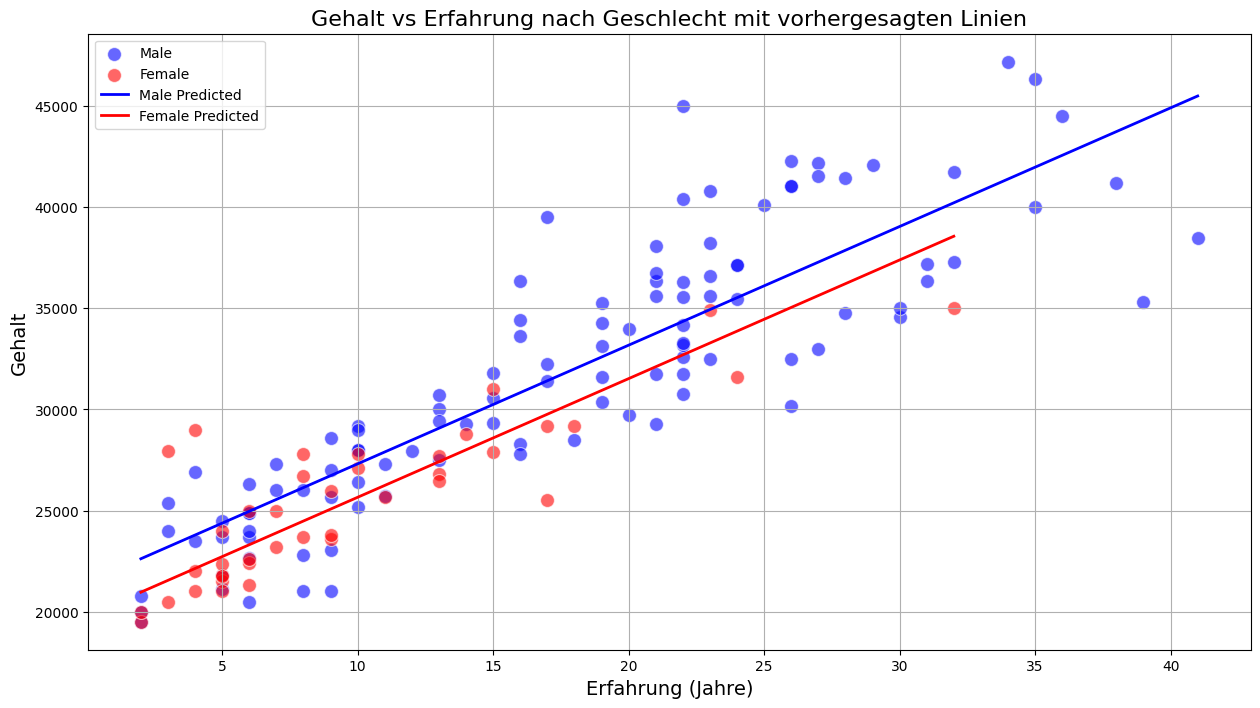

In [56]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Lade den Datensatz
df2 = pd.read_csv('11 Kategoriale_Variablen_Salorg.csv')

# Definiere die unabhängigen Variablen (X) und die abhängige Variable (y).
X = df2[['Experience', 'Gender_1F']]  
y = df2['Salary']  

# Füge den unabhängigen Varaiblen eine Konstante hinzu ( für den Intercept im Regressionsmodell).
X = sm.add_constant(X)

# Passe das Regressionsmodell unter Verwendung der Methode der kleinsten Quadrate (OLS) an.
model = sm.OLS(y, X).fit()

# Zusammenfassung des Modells
print(model.summary())

# Generiere vorhergesagte Werte.
df2['predicted_salary'] = model.predict(X)

# Gehalt im Vergleich zur Erfahrung plotten
plt.figure(figsize=(15, 8))

# Plotte männlich (Gender_1F == 0) und weiblich (Gender_1F == 1) separat.
sns.scatterplot(data=df2[df2['Gender_1F'] == 0], x='Experience', y='Salary', color='blue', label='Male', s=100, alpha=0.6)
sns.scatterplot(data=df2[df2['Gender_1F'] == 1], x='Experience', y='Salary', color='red', label='Female', s=100, alpha=0.6)

# Plotte vorhergesagte Linien für sowohl Männer als auch Frauen
sns.lineplot(data=df2[df2['Gender_1F'] == 0], x='Experience', y='predicted_salary', color='blue', label='Male Predicted', linewidth=2)
sns.lineplot(data=df2[df2['Gender_1F'] == 1], x='Experience', y='predicted_salary', color='red', label='Female Predicted', linewidth=2)


plt.title('Gehalt vs Erfahrung nach Geschlecht mit vorhergesagten Linien', fontsize=16)
plt.xlabel('Erfahrung (Jahre)', fontsize=14)
plt.ylabel('Gehalt', fontsize=14)


plt.legend()

plt.grid(True)
plt.show()
